In [1]:
import pandas as pd
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [2]:
import numpy as np
Y=df['target']
df=df.drop(['target'],axis=1)
df.head()
X=[]
y_train=[]
values=df.values
for i in range(len(values)):
    X.append([list(values[i])])
    y_train.append([Y[i]])

df['X']=X
x_train=df['X'].cumsum()
from keras.preprocessing.sequence import pad_sequences
x_train_new=pad_sequences(x_train,11)
x_train_new.shape
y_train=np.array(y_train)
y_train
s=x_train_new.shape
print(s)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(1025, 11, 13)


In [3]:
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x_train_new,y_train,test_size=0.2,random_state=0)

In [5]:
model=Sequential()
model.add(LSTM(100,input_dim=s[2],input_length=s[1]))
model.add(Dense(100,activation='relu',input_dim=61,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2,noise_shape=None,seed=None))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2,noise_shape=None,seed=None))
model.add(Dense(50,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2,noise_shape=None,seed=None))
model.add(Dense(1,activation='sigmoid'))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, input_shape=(11, 13))`
  


In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               45600     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
__________

In [7]:
model_output = model.fit(x_train,y_train,epochs=500,batch_size=40,verbose=1,validation_data=(x_test,y_test),)

Train on 820 samples, validate on 205 samples
Epoch 1/500
820/820 [==============================] - 19s 23ms/step - loss: 2.9756 - acc: 0.5463 - val_loss: 2.5716 - val_acc: 0.6683
Epoch 2/500
820/820 [==============================] - 3s 4ms/step - loss: 2.3334 - acc: 0.6378 - val_loss: 2.0083 - val_acc: 0.7220
Epoch 3/500
820/820 [==============================] - 3s 4ms/step - loss: 1.8518 - acc: 0.6610 - val_loss: 1.6030 - val_acc: 0.7366
Epoch 4/500
820/820 [==============================] - 3s 4ms/step - loss: 1.5269 - acc: 0.6659 - val_loss: 1.3222 - val_acc: 0.7463
Epoch 5/500
820/820 [==============================] - 3s 4ms/step - loss: 1.2727 - acc: 0.6902 - val_loss: 1.1185 - val_acc: 0.7561
Epoch 6/500
820/820 [==============================] - 3s 4ms/step - loss: 1.1056 - acc: 0.6805 - val_loss: 0.9880 - val_acc: 0.7220
Epoch 7/500
820/820 [==============================] - 3s 4ms/step - loss: 0.9756 - acc: 0.6915 - val_loss: 0.8764 - val_acc: 0.7610
Epoch 8/500
820/820 [

Epoch 62/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4175 - acc: 0.8415 - val_loss: 0.3972 - val_acc: 0.8488
Epoch 63/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4214 - acc: 0.8451 - val_loss: 0.3985 - val_acc: 0.8488
Epoch 64/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4275 - acc: 0.8317 - val_loss: 0.4056 - val_acc: 0.8439
Epoch 65/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4184 - acc: 0.8427 - val_loss: 0.3665 - val_acc: 0.8585
Epoch 66/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4228 - acc: 0.8500 - val_loss: 0.3729 - val_acc: 0.8537
Epoch 67/500
820/820 [==============================] - 3s 4ms/step - loss: 0.4110 - acc: 0.8427 - val_loss: 0.3541 - val_acc: 0.8780
Epoch 68/500
820/820 [==============================] - 3s 4ms/step - loss: 0.4368 - acc: 0.8305 - val_loss: 0.4060 - val_acc: 0.8537
Epoch 69/500
820/820 [==============================] - 6s 7ms

820/820 [==============================] - 3s 4ms/step - loss: 0.3708 - acc: 0.8683 - val_loss: 0.3388 - val_acc: 0.8780
Epoch 123/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3625 - acc: 0.8695 - val_loss: 0.3381 - val_acc: 0.8780
Epoch 124/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3705 - acc: 0.8756 - val_loss: 0.3656 - val_acc: 0.8927
Epoch 125/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3500 - acc: 0.8793 - val_loss: 0.3192 - val_acc: 0.8780
Epoch 126/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3426 - acc: 0.8902 - val_loss: 0.3388 - val_acc: 0.8732
Epoch 127/500
820/820 [==============================] - 3s 4ms/step - loss: 0.3650 - acc: 0.8585 - val_loss: 0.3369 - val_acc: 0.8732
Epoch 128/500
820/820 [==============================] - 3s 4ms/step - loss: 0.3873 - acc: 0.8683 - val_loss: 0.3276 - val_acc: 0.8829
Epoch 129/500
820/820 [==============================] - 3s 4ms/step 

820/820 [==============================] - 3s 3ms/step - loss: 0.3020 - acc: 0.8963 - val_loss: 0.3274 - val_acc: 0.8927
Epoch 183/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3223 - acc: 0.8988 - val_loss: 0.4219 - val_acc: 0.8341
Epoch 184/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3095 - acc: 0.9000 - val_loss: 0.3351 - val_acc: 0.9024
Epoch 185/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3013 - acc: 0.9024 - val_loss: 0.3202 - val_acc: 0.8927
Epoch 186/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2991 - acc: 0.9024 - val_loss: 0.3371 - val_acc: 0.8683
Epoch 187/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2909 - acc: 0.9146 - val_loss: 0.3147 - val_acc: 0.8878
Epoch 188/500
820/820 [==============================] - 3s 3ms/step - loss: 0.3342 - acc: 0.9000 - val_loss: 0.3197 - val_acc: 0.9024
Epoch 189/500
820/820 [==============================] - 3s 3ms/step 

820/820 [==============================] - 3s 3ms/step - loss: 0.2520 - acc: 0.9293 - val_loss: 0.3106 - val_acc: 0.8878
Epoch 243/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2714 - acc: 0.9280 - val_loss: 0.2986 - val_acc: 0.9122
Epoch 244/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2537 - acc: 0.9293 - val_loss: 0.3344 - val_acc: 0.8927
Epoch 245/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2367 - acc: 0.9402 - val_loss: 0.3339 - val_acc: 0.8927
Epoch 246/500
820/820 [==============================] - ETA: 0s - loss: 0.2439 - acc: 0.932 - 3s 3ms/step - loss: 0.2493 - acc: 0.9305 - val_loss: 0.3299 - val_acc: 0.8976
Epoch 247/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2465 - acc: 0.9341 - val_loss: 0.2974 - val_acc: 0.9220
Epoch 248/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2484 - acc: 0.9378 - val_loss: 0.3554 - val_acc: 0.8732
Epoch 249/500
820/820 [========

820/820 [==============================] - 3s 4ms/step - loss: 0.2071 - acc: 0.9561 - val_loss: 0.3018 - val_acc: 0.8976
Epoch 303/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1893 - acc: 0.9683 - val_loss: 0.3201 - val_acc: 0.8878
Epoch 304/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2070 - acc: 0.9598 - val_loss: 0.3189 - val_acc: 0.9122
Epoch 305/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2937 - acc: 0.9037 - val_loss: 0.3943 - val_acc: 0.8732
Epoch 306/500
820/820 [==============================] - 4s 4ms/step - loss: 0.3029 - acc: 0.8988 - val_loss: 0.3385 - val_acc: 0.8976
Epoch 307/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2369 - acc: 0.9354 - val_loss: 0.3048 - val_acc: 0.9073
Epoch 308/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2345 - acc: 0.9366 - val_loss: 0.3125 - val_acc: 0.8976
Epoch 309/500
820/820 [==============================] - 3s 4ms/step 

Epoch 363/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2010 - acc: 0.9512 - val_loss: 0.2827 - val_acc: 0.9220
Epoch 364/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2344 - acc: 0.9341 - val_loss: 0.3116 - val_acc: 0.9220
Epoch 365/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2228 - acc: 0.9427 - val_loss: 0.2763 - val_acc: 0.9171
Epoch 366/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2055 - acc: 0.9537 - val_loss: 0.2741 - val_acc: 0.9171
Epoch 367/500
820/820 [==============================] - 3s 4ms/step - loss: 0.1810 - acc: 0.9585 - val_loss: 0.2957 - val_acc: 0.9024
Epoch 368/500
820/820 [==============================] - 3s 4ms/step - loss: 0.1865 - acc: 0.9598 - val_loss: 0.2904 - val_acc: 0.9268
Epoch 369/500
820/820 [==============================] - 3s 4ms/step - loss: 0.1944 - acc: 0.9549 - val_loss: 0.3595 - val_acc: 0.8878
Epoch 370/500
820/820 [==============================] 

820/820 [==============================] - 3s 4ms/step - loss: 0.1745 - acc: 0.9561 - val_loss: 0.3751 - val_acc: 0.8780
Epoch 424/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1882 - acc: 0.9549 - val_loss: 0.2990 - val_acc: 0.9171
Epoch 425/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1760 - acc: 0.9598 - val_loss: 0.2823 - val_acc: 0.9122
Epoch 426/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1464 - acc: 0.9768 - val_loss: 0.3166 - val_acc: 0.9220
Epoch 427/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1787 - acc: 0.9622 - val_loss: 0.3040 - val_acc: 0.9171
Epoch 428/500
820/820 [==============================] - 3s 4ms/step - loss: 0.1649 - acc: 0.9671 - val_loss: 0.2885 - val_acc: 0.9171
Epoch 429/500
820/820 [==============================] - 3s 4ms/step - loss: 0.1458 - acc: 0.9780 - val_loss: 0.2783 - val_acc: 0.9268
Epoch 430/500
820/820 [==============================] - 3s 3ms/step 

Epoch 484/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1294 - acc: 0.9829 - val_loss: 0.2530 - val_acc: 0.9415
Epoch 485/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1226 - acc: 0.9805 - val_loss: 0.2617 - val_acc: 0.9317
Epoch 486/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1317 - acc: 0.9780 - val_loss: 0.3098 - val_acc: 0.9220
Epoch 487/500
820/820 [==============================] - 3s 3ms/step - loss: 0.1687 - acc: 0.9683 - val_loss: 0.3399 - val_acc: 0.8829
Epoch 488/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2112 - acc: 0.9354 - val_loss: 0.2638 - val_acc: 0.9366
Epoch 489/500
820/820 [==============================] - 4s 5ms/step - loss: 0.1498 - acc: 0.9695 - val_loss: 0.3247 - val_acc: 0.8927
Epoch 490/500
820/820 [==============================] - 3s 4ms/step - loss: 0.1517 - acc: 0.9646 - val_loss: 0.2719 - val_acc: 0.9366
Epoch 491/500
820/820 [==============================] 

In [8]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

Training Accuracy :  0.9075000019393317
Validation Accuracy :  0.8874048787878781


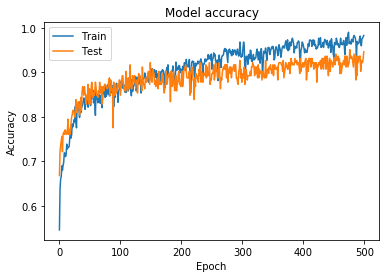

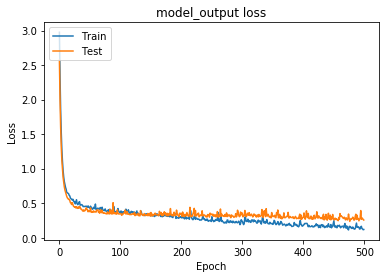

In [9]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

In [11]:
confusion_matrix(y_test,y_pred1)

array([[ 92,   6],
       [  5, 102]], dtype=int64)

In [12]:
precision_score(y_test,y_pred1)

0.9444444444444444

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test,y_pred1)

0.9463414634146341

In [15]:
model.save("Classifier3.h5")